In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt

## 1) MNIST dataset description

The MNIST dataset consists of 60k training examples and 10k test exemples, where each one of the examples are 28x28 pixel images of black and white numbers between 0 to 9.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

Count the number of unique target labels per class (train and test data)

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
unique, counts = np.unique(y_test, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Sample 25 mnist digitsfrom train dataset

In [7]:
indexes = np.random.randint(0, x_train.shape[0], size=25)

images = x_train[indexes]
labels = y_train[indexes]

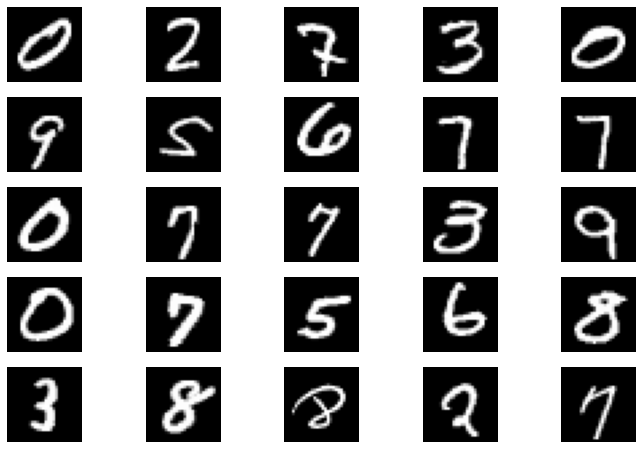

In [8]:
plt.figure(figsize=(12, 8))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

## 2) Data processing and modelling

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))

print("x_train size " + str(x_train.shape))
print("y_train size " + str(y_train.shape))

x_train size (60000, 28, 28)
y_train size (60000,)


The first thing we do is to transform the y_train vector, which represents the labels of each of the 60k training images, into a one-hot vector, that is, each label is transformed into a 1x10 array with 1 in the position corresponding with the label number and 0's otherwise.

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size # assume square input

print("new y_train size " + str(y_train.shape))
print("input size " + str(input_size))

new y_train size (60000, 10)
input size 784


Below we transform each each 28x28 image into a 1x(28x28) inputs vector

In [11]:
np.reshape(x_train[1], [-1, input_size]).shape

(1, 784)

In [12]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / x_train.max()
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

print("new x_train size " + str(x_train.shape))

new x_train size (60000, 784)


Next, we define the network parameters and we define the neural network structure

In [34]:
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(units=hidden_units,
                input_dim=input_size,
                activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(units=hidden_units,
                activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(num_labels,
                activation="softmax"))# this is the output for one-hot vector

# model visualization
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [35]:
x_train.shape

(60000, 784)

In [36]:
y_train.shape

(60000, 10)

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4298 - accuracy: 0.8664
Epoch 2/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1982 - accuracy: 0.9405
Epoch 3/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1554 - accuracy: 0.9539
Epoch 4/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1307 - accuracy: 0.9615
Epoch 5/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1158 - accuracy: 0.9647
Epoch 6/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1034 - accuracy: 0.9684
Epoch 7/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0942 - accuracy: 0.9706
Epoch 8/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0887 - accuracy: 0.9721
Epoch 9/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0837 - accuracy: 0.9742
Epoch 10/20

In [38]:
_, acc = model.evaluate(x_test,
                        y_test,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.1%
